In [1]:
import os

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget -q https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

In [3]:
TRAIN_DIR = "./cats_and_dogs_filtered/train"
VAL_DIR = "./cats_and_dogs_filtered/validation"

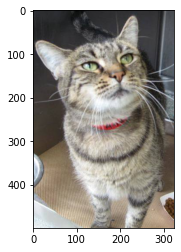

In [4]:
label = "cats"
train_sample_fn = os.listdir(os.path.join(TRAIN_DIR, label))[0]
train_sample_path = os.path.join(TRAIN_DIR, label, train_sample_fn)

img = Image.open(train_sample_path)
img_data = np.asarray(img)
plt.imshow(img_data);

In [5]:
IMG_SIZE = (224, 224)
INP_SHAPE = (*IMG_SIZE, 3)
BATCH_SIZE = 64

def gen_new_data(data_folder, augmented=True):
  if augmented:
    data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip=True)
  else:
    data_gen = ImageDataGenerator(rescale=1./255)

  data = data_gen.flow_from_directory(
      data_folder,
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      class_mode="binary",
  )
  return data

In [6]:
INP_SHAPE

(224, 224, 3)

In [7]:
ds_train = gen_new_data(TRAIN_DIR, augmented=True)
ds_val = gen_new_data(VAL_DIR, augmented=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental.preprocessing import Resizing

## ResNet

In [9]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4" 

resnet = Sequential()
resnet.add(Resizing(224, 224, input_shape=INP_SHAPE))
resnet.add(hub.KerasLayer(resnet_url, trainable=False))
resnet.add(Dense(1, activation="sigmoid"))
resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [10]:
INP_SHAPE

(224, 224, 3)

In [11]:
resnet.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [12]:
resnet_history = resnet.fit(ds_train, epochs=15, validation_data=ds_val)

Epoch 1/15
32/32 [==============================] - 47s 970ms/step - loss: 0.2650 - acc: 0.9020 - val_loss: 0.0856 - val_acc: 0.9790
Epoch 2/15
32/32 [==============================] - 30s 929ms/step - loss: 0.0989 - acc: 0.9650 - val_loss: 0.0474 - val_acc: 0.9890
Epoch 3/15
32/32 [==============================] - 29s 919ms/step - loss: 0.0702 - acc: 0.9770 - val_loss: 0.0374 - val_acc: 0.9910
Epoch 4/15
32/32 [==============================] - 29s 918ms/step - loss: 0.0665 - acc: 0.9750 - val_loss: 0.0418 - val_acc: 0.9870
Epoch 5/15
32/32 [==============================] - 31s 939ms/step - loss: 0.0584 - acc: 0.9785 - val_loss: 0.0284 - val_acc: 0.9910
Epoch 6/15
32/32 [==============================] - 30s 923ms/step - loss: 0.0583 - acc: 0.9825 - val_loss: 0.0268 - val_acc: 0.9910
Epoch 7/15
32/32 [==============================] - 29s 913ms/step - loss: 0.0523 - acc: 0.9815 - val_loss: 0.0281 - val_acc: 0.9900
Epoch 8/15
32/32 [==============================] - 29s 918ms/step - 

## MobileNetV2

In [ ]:
from tensorflow.keras.layers import InputLayer


In [ ]:
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

mobilenet = Sequential()
mobilenet.add(InputLayer(input_shape=INP_SHAPE))
mobilenet.add(hub.KerasLayer(mobilenet_url, trainable=False))
mobilenet.add(Dense(1, activation="sigmoid"))
mobilenet.summary()

In [ ]:
mobilenet.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
mobilenet_history = mobilenet.fit(ds_train, epochs=20, validation_data=ds_val)

## Inception Net

In [ ]:
inceptionnet_url = "https://tfhub.dev/google/imagenet/inception_v3/classification/4" 

inceptionnet = Sequential()
inceptionnet.add(InputLayer(input_shape=INP_SHAPE))
inceptionnet.add(hub.KerasLayer(mobilenet_url, trainable=False))
inceptionnet.add(Dense(1, activation="sigmoid"))
inceptionnet.summary()

In [ ]:
inceptionnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
inceptionnet_history = inceptionnet.fit(ds_train, epochs=15, validation_data=ds_val)

In [ ]:
import numpy as np
import sklearn
x = np.array([2, 0, 0])
y = np.array([2, 0, 4])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(x, y)

In [ ]:
import numpy as np
import sklearn
x = np.array([1, 1, 0])
y = np.array([1, 1, 1, 1])
x.dot(y) / (np.sqrt(sum(x**2)) * np.sqrt(sum(y**2)))

In [ ]:
3 / (np.sqrt(10) * (np.sqrt(3)))